# CSE547 - Colab 6
## node2vec

Adapted from Stanford's CS246

### Setup

First of all, we install the [nodevectors library](https://github.com/VHRanger/graph2vec) which offers a fast implementation of the node2vec method.

If you are curious to learn how to implement fast random walks on graphs, I recommend you to [read the blog post](https://www.singlelunch.com/2019/08/01/700x-faster-node2vec-models-fastest-random-walks-on-a-graph/) which explains some of the design choices behind this library.

In [ ]:
!pip install nodevectors 
!pip install gensim==3.6
!pip install networkx==2.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for nodevectors: filename=nodevectors-0.1.23-py3-none-any.whl size=17952 sha256=0bf235d8f1087ff908fbbee0fadf23df9b9e221f38308749d5577fec9d06a2cf
  Stored in directory: /root/.cache/pip/wheels/fa/f1/fa/9d244fa4cbef616ff3e05f36217702763f8a0c63a15b8bf279
  Created wheel for csrgraph: filename=csrgraph-0.1.28-py3-none-any.whl size=17633 sha256=7638e6f9e00584673f81f24fd52937f791a763fd5c791e4e13663d65a3deef33
  Stored in directory: /root/.cache/pip/wheels/76/63/94/77c09d731a068c6e6fa91f1eca950919b35ffaf0d0b526d901
Successfully built nodevectors csrgraph
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1

We now import the library, and create a small wrapper class which will expose only the few hyperparameters we will need to tune in this Colab

In [ ]:
from nodevectors import Node2Vec
import networkx as nx

class Node2Vec(Node2Vec):
  """
  Parameters
  ----------
  p : float
      p parameter of node2vec
  q : float
      q parameter of node2vec
  d : int
      dimensionality of the embedding vectors
  """
  def __init__(self, p=1, q=1, d=32):
    super().__init__(
                     walklen=10,
                     epochs=50,
                     n_components=d,
                     return_weight=1.0/p,
                     neighbor_weight=1.0/q,
                     threads=0,
                     w2vparams={'window': 4,
                                'negative': 5, 
                                'iter': 10,
                                'ns_exponent': 0.5,
                                'batch_words': 128})

Lastly, let's import some of the common libraries needed for our task.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example

In the example below, we will use Zachary's Karate Club to demonstrate the power of node2vec. 

In [ ]:
# Load the Zachary's Karate Club as a NetworkX Graph object
KCG = nx.karate_club_graph()

# Fit embedding model to the Karate Club graph
n2v = Node2Vec(1, 1, 2)
n2v.fit(KCG)

Making walks... 

Done, T=2.98
Mapping Walk Names... Done, T=0.05
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.38


In [ ]:
embeddings = []
for node in KCG.nodes:
  embedding = list(n2v.predict(node))
  club = KCG.nodes[node]['club']
  embeddings.append(embedding + [club])

# Construct a pandas dataframe with the 2D embeddings from node2vec,
# plus the club name that each node belongs to after the split
df = pd.DataFrame(embeddings, columns=['x', 'y', 'club'])

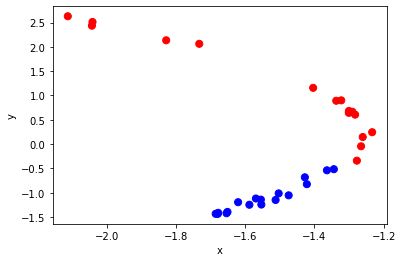

In [ ]:
# Nodes who stayed with the Mr. Hi will be plotted in red, while nodes
# who moved with the Officer will be plotted in blue
colors = ['red' if x == 'Mr. Hi' else 'blue' for x in df.club]
df.plot.scatter(x='x', y='y', s=50, c=colors)

If our example trained correctly, you should notice a clear separation between the blue and red nodes.  Solely from the graph structure, node2vec could predict how the Zachary's Karate Club split!

Tune the hyperparameters ```p``` and ```q```, and notice how they affect the resulting embeddings.

### Your Task

Now we will study the behavior of node2vec on [barbell graphs](https://en.wikipedia.org/wiki/Barbell_graph).

Below you can see a toy example of a barbell graph generated with NetworkX ( [nx.barbell_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.barbell_graph.html#networkx.generators.classic.barbell_graph) ).

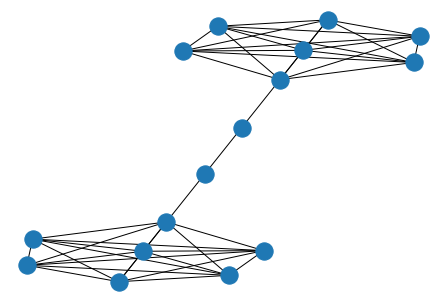

In [ ]:
toy_barbell = nx.barbell_graph(7, 2)
nx.draw_kamada_kawai(toy_barbell)

Above is a barbell graph with a 2 node path inbetween two complete graphs. 

Generate a larger barbell graph, where each complete graph has exactly 1000 nodes, and there are no nodes in the path inbetween them (i.e., all the nodes in the barbell graph belong to either one of the two complete graphs, and the connecting path does not have any internal node).

Then, learn node2vec embeddings on this graph, setting ```p = 1, q = 1``` and ```d = 10```.

Making walks... Done, T=0.12
Mapping Walk Names... 

Done, T=0.51
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=15.20


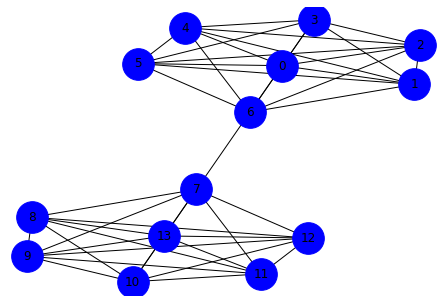

In [ ]:
# YOUR CODE HERE
options = {
    'node_color': 'blue',
    'node_size': 1000,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}



In [ ]:
#nx.draw_kamada_kawai(toy_barbell,**options, with_labels = True)
large_barbell = nx.barbell_graph(1000, 0)


# Setting parameters
p = 1
q = 1
d = 10

# Learn node2vec
n2v_barbell = Node2Vec(p, q, d)

# Fitting data
n2v_barbell.fit(large_barbell)

Making walks... Done, T=0.42
Mapping Walk Names... 

Done, T=1.15
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=41.02


In [ ]:
len(large_barbell.edges)

999001

In [ ]:
len(large_barbell.nodes)

Generate another barbell graph, this time adding a path of 50 nodes between the two complete graphs.

Learn the node2vec embeddings for the nodes of this new graph, using the same hyperparameters as before.

In [ ]:
#nx.draw_kamada_kawai(toy_barbell,**options, with_labels = True)
large_barbell2 = nx.barbell_graph(1000, 50)


# Setting parameters
p = 1
q = 1
d = 10

# Learn node2vec
n2v_barbell2 = Node2Vec(p, q, d)

# Fitting data
n2v_barbell2.fit(large_barbell2)

Making walks... Done, T=0.36
Mapping Walk Names... 

Done, T=0.75
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=43.90


In [ ]:
len(large_barbell.edges)

999051

Now write a function that takes as input a node id ```n``` in the graph (e.g., ```5```) and returns a list containing the cosine similarity between the node2vec vector obtained from `model.predict(...)` of the input node ```n``` and all the nodes in the given barbell graph (including the similarity with ```n``` itself).

It may be easier to implement your own `cosine_similarity` function, as using `sklearn`'s `cosine_similarity` function makes assumptions on the shape of the input and requires you to reshape the embeddings before use, which might be a little slow.

In [ ]:
# YOUR CODE HERE
from scipy import spatial
from numpy.linalg import norm
from numpy import dot

def cosine_distance(a, b):
    #cosine_distance = float(spatial.distance.cosine(a, b))
    cosine_distance = dot(a, b)/(norm(a) * norm(b))
    return cosine_distance

def similarity(n=5, g=large_barbell, embed=n2v_barbell):
  result = []
  a= embed.predict(n)
  for node in g.nodes:
    b = embed.predict(node)
    result.append(cosine_distance(a, b))
  return len([i for i in result if i > 0.8])
     

In [ ]:
cosine_distance(1,1)

1.0

In [ ]:
dic = {}
for i in range(2000):
  dic[i] = similarity(n = i)
  

In [ ]:
sum(1 for v in dic.values() if v == 1000)

2000

In [ ]:
dic1 = {}
for i in range(2000):
  dic1[i] = similarity(n = i, g=large_barbell2, embed=n2v_barbell2)

In [ ]:
sum(1 for v in dic1.values() if v >= 1000)

1947

In [ ]:
sum(1 for v in dic1.values() if v == 1000)

0

In [ ]:
dic1

{0: 999,
 1: 999,
 2: 999,
 3: 999,
 4: 999,
 5: 999,
 6: 999,
 7: 999,
 8: 999,
 9: 999,
 10: 999,
 11: 999,
 12: 999,
 13: 999,
 14: 999,
 15: 999,
 16: 999,
 17: 999,
 18: 999,
 19: 999,
 20: 999,
 21: 999,
 22: 999,
 23: 999,
 24: 999,
 25: 999,
 26: 999,
 27: 999,
 28: 999,
 29: 999,
 30: 999,
 31: 999,
 32: 999,
 33: 999,
 34: 999,
 35: 999,
 36: 999,
 37: 999,
 38: 999,
 39: 999,
 40: 999,
 41: 999,
 42: 997,
 43: 999,
 44: 999,
 45: 999,
 46: 999,
 47: 999,
 48: 999,
 49: 999,
 50: 999,
 51: 999,
 52: 999,
 53: 999,
 54: 999,
 55: 999,
 56: 999,
 57: 999,
 58: 999,
 59: 999,
 60: 999,
 61: 999,
 62: 999,
 63: 999,
 64: 999,
 65: 999,
 66: 999,
 67: 999,
 68: 999,
 69: 999,
 70: 999,
 71: 999,
 72: 999,
 73: 999,
 74: 999,
 75: 999,
 76: 999,
 77: 999,
 78: 999,
 79: 999,
 80: 999,
 81: 999,
 82: 999,
 83: 999,
 84: 999,
 85: 999,
 86: 999,
 87: 999,
 88: 999,
 89: 999,
 90: 999,
 91: 999,
 92: 999,
 93: 999,
 94: 999,
 95: 999,
 96: 999,
 97: 999,
 98: 999,
 99: 999,
 100: 999,

For each of the graphs you generated earlier (0 Node Path, 50 Node Path), find how many nodes have exactly 1000 neighbors and how many nodes have less than 100 neighbors.

Two nodes are defined as neighbors if their cosine similarity is greater than 0.8.

In [ ]:
# YOUR CARE HERE


Once you have working code for each cell above, **head over to Gradescope, read carefully the questions, and submit your solution for this Colab**!
